In [203]:
'''
General use of visualization techniques for data analysis
Classification of male or female gender based on heights and weights
'''
%matplotlib inline
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt 
import pandas as pd
import sys 
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
from scipy.stats import gaussian_kde
import scipy.stats as stats
import seaborn as sns
sns.set(color_codes=True)

In [197]:
data = read_csv("../../datasets/heights_weights_genders.csv")

In [5]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

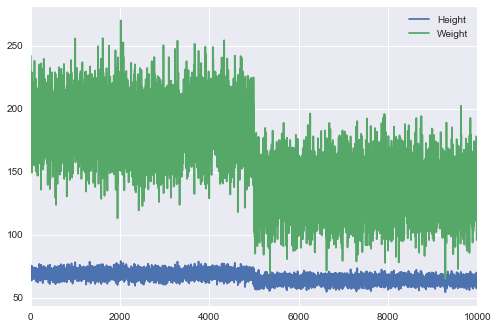

In [6]:
plt.figure()
data.plot()

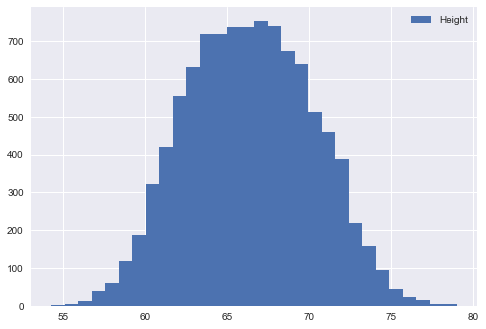

In [7]:
plt.hist(data['Height'], bins=30, label = 'Height')
plt.legend(loc='best')

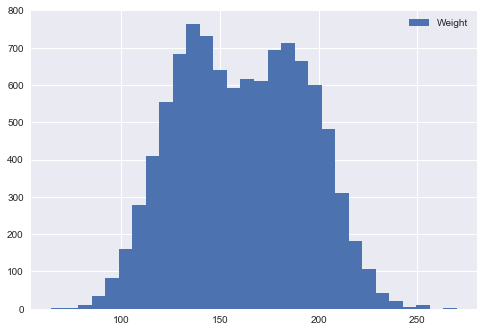

In [9]:
plt.hist(data['Weight'], bins=30, label="Weight")
plt.legend(loc='best')

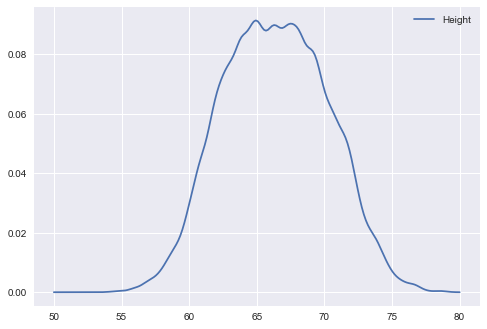

In [10]:
density = gaussian_kde(data["Height"])
xs = np.linspace(50,80,200)
density.covariance_factor = lambda : .1
density._compute_covariance()
plt.plot(xs,density(xs), label="Height")
plt.legend(loc='best')

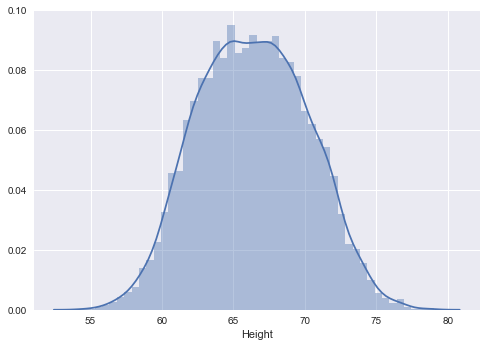

In [11]:
# Use of seaborn can simplify making kernel density estimate fit density plots
sns.distplot(data['Height'])
# We can turn histogram underlying off by setting `hist = False`
# We can use rug by setting `rug = False`

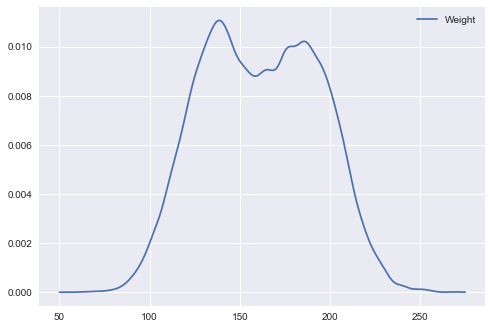

In [12]:
density = gaussian_kde(data["Weight"])
xs = np.linspace(50,275,200)
density.covariance_factor = lambda : .1
density._compute_covariance()
plt.plot(xs,density(xs), label="Weight")
plt.legend(loc='best')

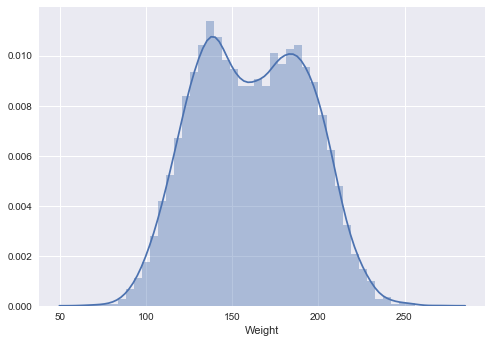

In [13]:
sns.distplot(data['Weight'])

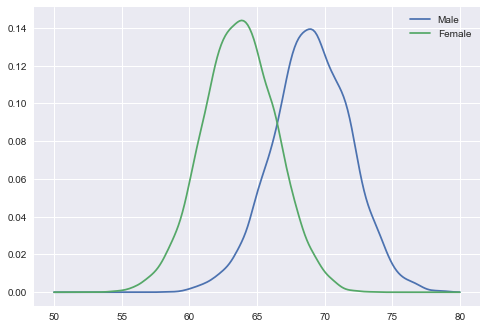

In [14]:
densityMale = gaussian_kde(data["Height"].loc[data["Gender"]=="Male"])
densityFemale = gaussian_kde(data["Height"].loc[data["Gender"]=="Female"])
xs = np.linspace(50,80,200)
density.covariance_factor = lambda : .1
density._compute_covariance()
plt.plot(xs,densityMale(xs), label="Male")
plt.plot(xs,densityFemale(xs), label="Female")
plt.legend(loc='best')

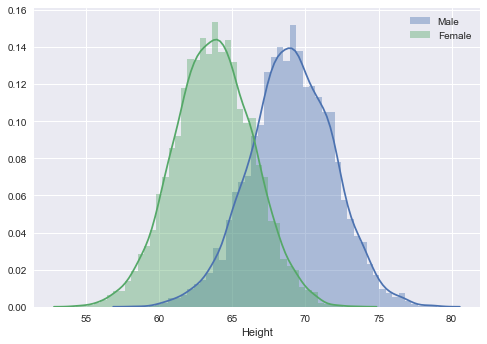

In [17]:
sns.distplot(data['Height'].loc[data['Gender'] == 'Male'], label = 'Male')
sns.distplot(data['Height'].loc[data['Gender'] == 'Female'], label = 'Female')
plt.legend(loc='best')

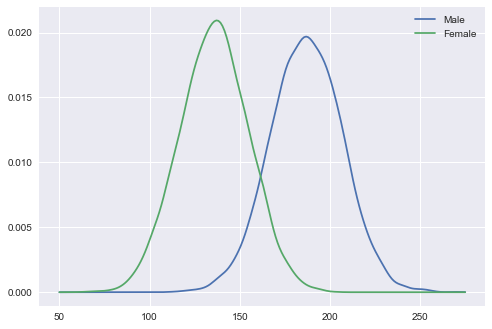

In [18]:
densityMale = gaussian_kde(data["Weight"].loc[data["Gender"]=="Male"])
densityFemale = gaussian_kde(data["Weight"].loc[data["Gender"]=="Female"])
xs = np.linspace(50,275,200)
density.covariance_factor = lambda : .1
density._compute_covariance()
plt.plot(xs,densityMale(xs), label="Male")
plt.plot(xs,densityFemale(xs), label="Female")
plt.legend(loc='best')

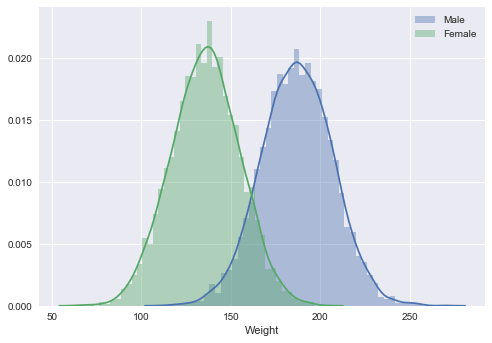

In [20]:
sns.distplot(data['Weight'].loc[data['Gender'] == 'Male'], label='Male');
sns.distplot(data['Weight'].loc[data['Gender'] == 'Female'], label='Female')
plt.legend(loc='best')

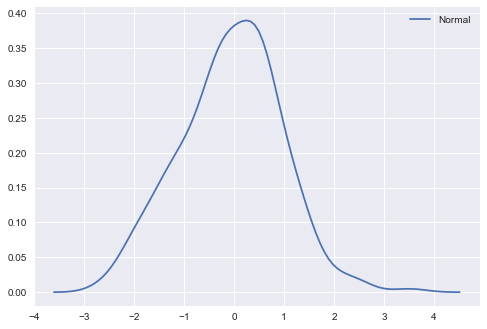

In [198]:
'''
Uni/Bimodal vs Multimodal
Symmetric Distribution vs Skewed Distribution (Normal vs Gamma)
Thin tailed vs Heavy tailed
Kurtosis
>> https://stats.stackexchange.com/questions/172467/what-is-the-meaning-of-tail-of-kurtosis
'''
# NORMAL DISTRIBUTION
normal_val = np.random.standard_normal(250)
# plt.hist(normal_val, bins=30)
# print(normal_val)
sns.distplot(normal_val, hist=False, label='Normal')

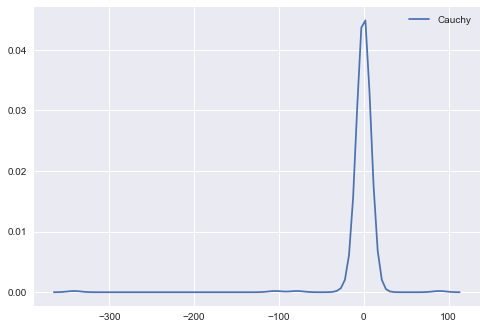

In [199]:
# CAUCHY DISTRIBUTION
cauchy_val = np.random.standard_cauchy(250)
sns.distplot(cauchy_val, hist=False, label='Cauchy')
# plt.hist(cauchy_val, bins=30)

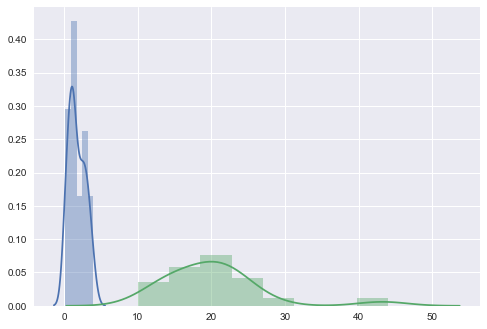

In [201]:
'''
A thin- tailed distribution usually produces values that are not far from the mean; 
let’s say that it does so 99% of the time. The normal distribution, for example, 
produces values that are no more than three standard deviations away from the mean 
about 99% of the time. In contrast, another bell-shaped distribution called the 
Cauchy distribution produces only 90% of its values inside those three standard 
deviation bounds.
'''
# GAMMA DISTRIBUTION
gamma_val_skewed = [np.random.gamma(shape=1, scale=2) for i in range(0, 200, 5)]
# k=shape, theta=scale
gamma_val_less_skewed = [np.random.gamma(shape=10, scale=2) for i in range(0, 200, 5)]

# On increasing value of k, we get a curve more and more resembling a normal curve
sns.distplot(gamma_val_skewed)
sns.distplot(gamma_val_less_skewed)
# Due to the skew, the mean and median differ unlike in normal distribution
# Values produced are positive only

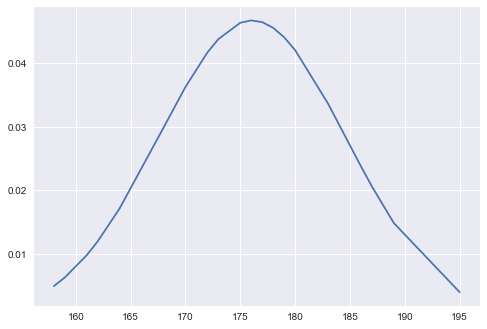

In [202]:
h = [186, 176, 158, 180, 186, 168, 168, 164, 178, 170, 189, 195, 172,
     187, 180, 186, 185, 168, 179, 178, 183, 179, 170, 175, 186, 159,
     161, 178, 175, 185, 175, 162, 173, 172, 177, 175, 172, 177, 180]

h.sort()
hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, hmean, hstd)
plt.plot(h, pdf)

(array([ 18.,  17.,   9.,  10.,   7.,   7.,   5.,   2.,   9.,   3.,   0.,
          2.,   0.,   2.,   2.,   1.,   1.,   1.,   0.,   0.,   2.,   0.,
          0.,   1.,   1.]),
 array([ 0.00953771,  0.11941903,  0.22930035,  0.33918168,  0.449063  ,
         0.55894432,  0.66882564,  0.77870696,  0.88858828,  0.9984696 ,
         1.10835093,  1.21823225,  1.32811357,  1.43799489,  1.54787621,
         1.65775753,  1.76763886,  1.87752018,  1.9874015 ,  2.09728282,
         2.20716414,  2.31704546,  2.42692678,  2.53680811,  2.64668943,
         2.75657075]),
 <a list of 25 Patch objects>)

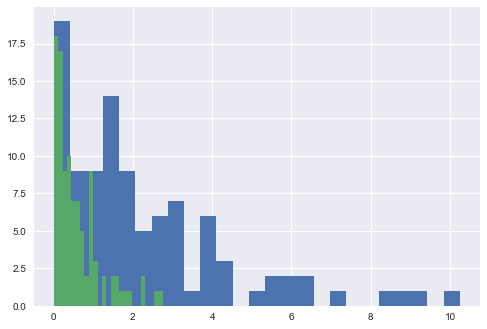

In [217]:
# scale = 1/lambda = beta
expo_val = [np.random.exponential(scale=2) for i in range(100)]
# sns.distplot(expo_val)
plt.hist(expo_val, bins=25)
expo_val2 = [np.random.exponential(scale=0.5) for i in range(100)]
plt.hist(expo_val2, bins=25)

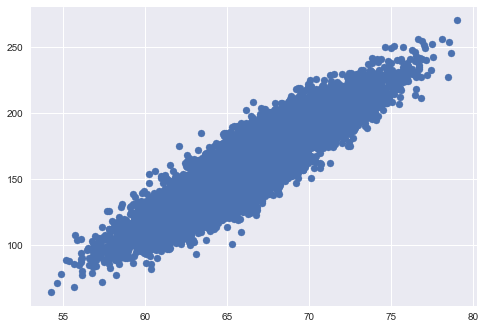

In [220]:
plt.scatter(data['Height'], data['Weight'])

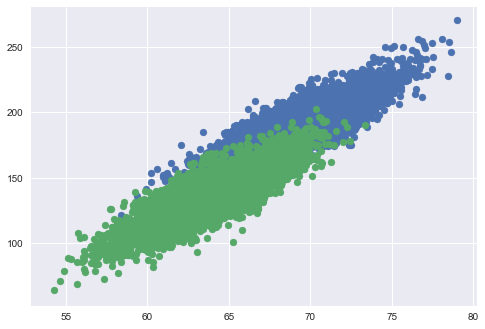

In [219]:
male_height = data['Height'].loc[data['Gender'] == 'Male']
female_height = data['Height'].loc[data['Gender'] == 'Female']
male_weight = data['Weight'].loc[data['Gender'] == 'Male']
female_weight = data['Weight'].loc[data['Gender'] == 'Female']
plt.scatter(male_height, male_weight)
plt.scatter(female_height, female_weight)

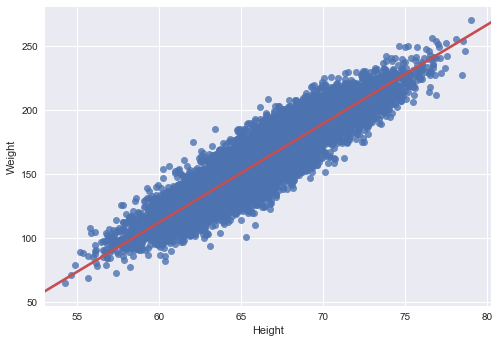

In [243]:
# Scatter plot with line of best fit 
sns.regplot(data['Height'], data['Weight'], color='r', scatter_kws={'color':'b'})

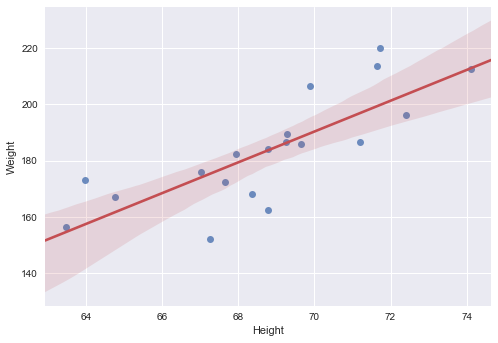

In [242]:
# With only 20 observations
sns.regplot(data['Height'][1:20], data['Weight'][1:20], color='r', scatter_kws={'color':'b'})

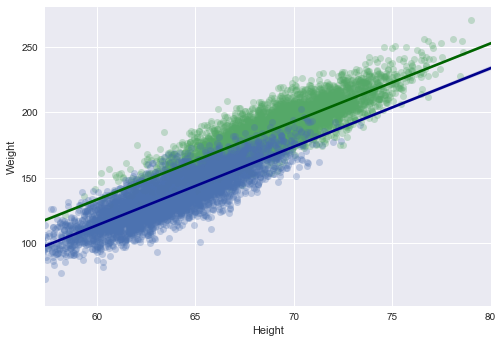

In [254]:
sns.regplot(male_height, male_weight, color='darkgreen', scatter_kws={'color':'g', 'alpha':0.3})
sns.regplot(female_height, female_weight, color='darkblue', scatter_kws={'color':'b', 'alpha':0.3})